# **Análise exploratória**

Calma calma! Se você caiu aqui com a ideia que ia ser dar bem no ENEM sem estudar não é essa a idea! Mas se você já conhece ou ouvir falar sobre Machine Learning sabe que a chamada desse artigo é pouco sensacionalista.
Mas sim, é possível ‘prever’ as notas, e isso que o Codenation propõe num desafio no seu site, no caso a nota da prova de matemática.

Aproveitando para comentar, lá não possui somente desafios de Data Science, nesse momento existem mais dois desafios acontecendo: ‘JAVA’ e ‘Python para Web’. Para saber mais sobre esses desafios e o programa de aceleração de carreira acesse o site do Codenation.

Lembrando que o propósito deste artigo é:

Apresentar o desafio.
Mostrar algumas análises feitas.
Dicas
Vamos ao que interessa !

**1 - Iniciando:**
É necessário instalar várias coisas, porém para facilitar a nossa vida podemos instalar o ANACONDA, com ele será instalado as bibliotecas necessárias, o Python e o Jupyter Notebook.

Ou mais fácil ainda, podemos usar o Colab do Google, onde é necessário somente uma conta Google para ter um “Jupyter notebook” no navegador.

**2 - Entendendo o nosso problema:**
O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

matemática: 3 
ciências da natureza: 2
linguagens e códigos: 1.5
ciências humanas: 1
redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

**3 — Mão na massa**

**Importando os dados**

In [0]:
import numpy as np
import pandas as pd
from sklearn import metrics

df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

**Quais colunas temos na base de test para trabalhar ?**

In [0]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

**Vamos verificar quais features tem uma maior correlação com o nosso target (NU_NOTA_MT)**

In [0]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,0.012417,0.012390,-0.017212,-0.003462,-0.019700,-0.005958,0.015501,0.015280,0.019204,-0.006345,-0.000998,0.024913,0.003673,0.036442,0.036360,0.036790,0.016301,-0.000051,0.039569,0.002474,NaN,0.004811,0.003346,NaN,-0.023838,NaN,-0.002929,NaN,NaN,NaN,-0.014019,-0.023393,0.017291,0.006240,0.025713,0.010483,NaN,0.004746,...,NaN,NaN,NaN,NaN,NaN,-0.010770,0.024311,0.056743,0.013873,0.013761,0.001345,0.001345,0.002176,0.002176,0.029789,0.020229,0.027408,0.030157,-0.002374,0.026179,0.002075,0.004812,0.011678,0.006585,-0.012834,0.001956,-0.009171,0.011400,-0.006648,0.018371,0.001005,0.020941,-0.002151,0.021869,-0.000412,-0.016739,-0.010352,-0.002693,-0.013917,-0.076506
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,0.012417,NaN,1.000000,0.999863,-0.014001,0.025471,-0.233805,0.026289,0.882889,0.882864,0.026948,-0.021956,0.019573,0.018492,-0.024623,0.989333,0.989601,0.989396,0.042002,-0.026489,0.035313,0.012520,NaN,-0.022851,0.020271,NaN,-0.000768,NaN,0.000714,NaN,NaN,NaN,-0.017313,0.020338,0.014948,-0.011139,0.005674,-0.028088,NaN,-0.008733,...,NaN,NaN,NaN,NaN,NaN,0.007525,-0.008965,0.986169,0.980859,0.980696,-0.057860,-0.057860,-0.051606,-0.051606,0.079319,0.102606,0.111937,0.082294,-0.080269,-0.018898,0.081480,0.075271,0.054262,0.068167,0.049556,0.073217,-0.124580,-0.048386,-0.045469,-0.003707,0.015670,-0.022741,-0.031538,-0.026038,-0.033451,-0.020920,-0.035817,-0.114210,-0.080364,-0.058302
CO_UF_RESIDENCIA,0.012390,NaN,0.999863,1.000000,-0.013661,0.025744,-0.232570,0.025956,0.882390,0.882579,0.027532,-0.021934,0.019072,0.019299,-0.023844,0.989433,0.989506,0.989583,0.040959,-0.025692,0.035071,0.012199,NaN,-0.022590,0.020290,NaN,-0.000941,NaN,0.000507,NaN,NaN,NaN,-0.017264,0.020290,0.015367,-0.011042,0.005875,-0.027871,NaN,-0.008780,...,NaN,NaN,NaN,NaN,NaN,0.006957,-0.008245,0.986161,0.980708,0.980789,-0.058257,-0.058257,-0.051934,-0.051934,0.077990,0.100662,0.109956,0.080769,-0.078176,-0.018672,0.080866,0.074706,0.053645,0.067346,0.048522,0.072369,-0.123766,-0.047786,-0.044622,-0.003833,0.015074,-0.023019,-0.031492,-0.025441,-0.033807,-0.021215,-0.035659,-0.113377,-0.079566,-0.058433
NU_IDADE,-0.017212,NaN,-0.014001,-0.013661,1.000000,0.514061,0.012209,-0.035813,-0.046646,-0.046172,-0.286021,0.711154,-0.298999,0.452562,-0.293180,-0.047517,-0.048171,-0.046743,-0.092526,0.048341,0.042418,0.036870,NaN,0.022524,0.001122,NaN,0.039330,NaN,-0.003544,NaN,NaN,NaN,0.013348,0.005874,0.024206,0.010176,0.007826,0.146079,NaN,0.041231,...,NaN,NaN,NaN,NaN,NaN,0.039153,0.080146,0.141062,-0.011408,-0.011037,-0.257991,-0.257991,-0.252369,-0.252369

As features com maiores correlações em relação ao nosso Target (NU_NOTA_MT) serão as melhores a serem usadas, porém somente a seleção delas não vai garantir que sua análise seja satisfatória. De qualquer forma, vamos se atentar a selecionar as melhores nesse momento.


**Verificar como está as distribuições**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']



**Verificando os valores nulos:**

In [0]:
df_train[features].isnull().sum()

NU_NOTA_CN         885
NU_NOTA_CH         885
NU_NOTA_LC         954
NU_NOTA_REDACAO    954
NU_NOTA_COMP1      954
NU_NOTA_COMP2      954
NU_NOTA_COMP3      954
NU_NOTA_COMP4      954
NU_NOTA_COMP5      954
dtype: int64

**São muitos valores nulos!**

**Criando um heatmap das Features incluindo NU_NOTA_MT para vermos as nossas correlações:**


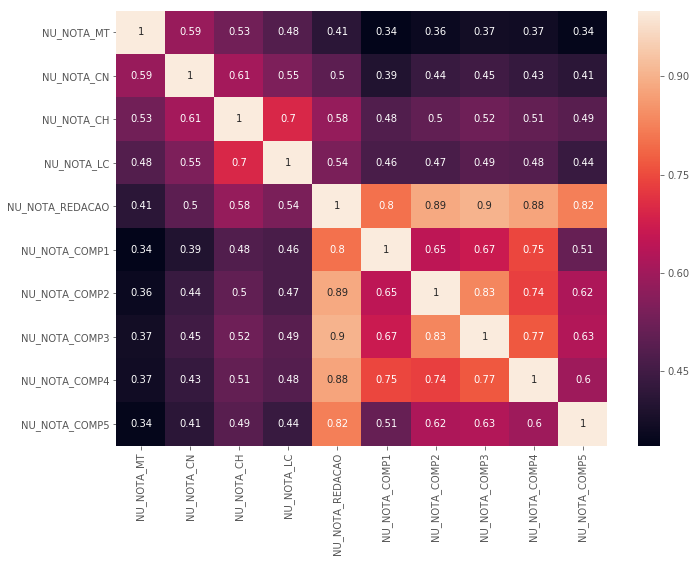

In [0]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})


**Criaremos alguns gráficos para ver a distribuição dos dados:**

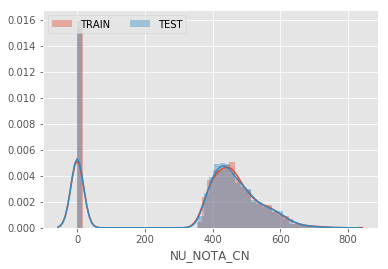

In [0]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


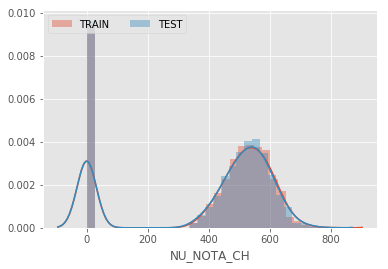

In [0]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

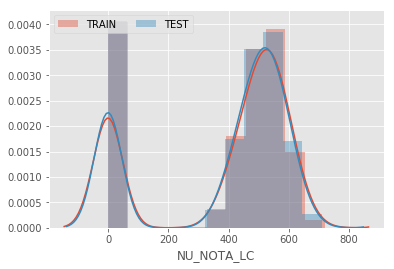

In [0]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

Como podemos ver há uma grande parte de notas zeradas pois colocamos os valores null como 0.

O que vai ser feito daqui para frente fica a critério do cientista de dados, entre as alternativas são:

Aplicar a média nas notas.
Deixar zerado.
Remover do dataset de treino esse valores.
Todas essa opções vão gerar resultados diferentes do dataset. A minha escolha nesse problema foi remover essas notas do dataset de treino. Dessa forma meu modelo vai ser treinado numa base com distribuição ‘normal’.

Para a composição da nota de redação vou aplicar o valor 0, devido ele não ter atingido ao critério, a nota é zero mesmo.

Obs: Todos esses assumptions já estão sendo feitos após eu ler exaustivamente o dicionário de dados, o qual eu recomendo fortemente que você faça antes de começar qualquer análise em um dataset (caso odicionário exista).

In [0]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

**Vamos verificar os gráficos novamente**

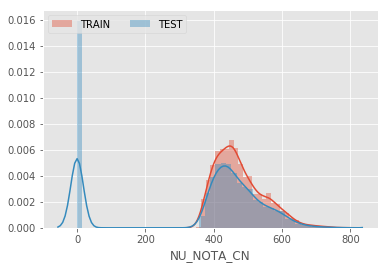

In [0]:

x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


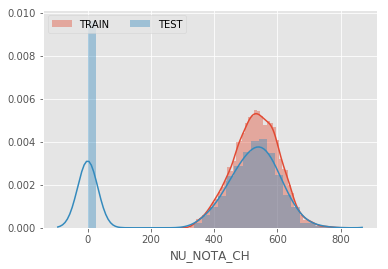

In [0]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

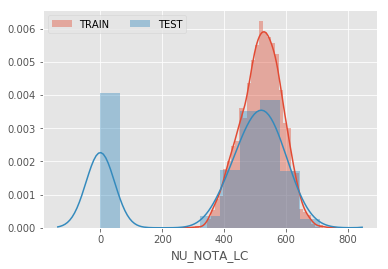

In [0]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

**Insight**: as provas do ENEM são feitas em dois dias, e nesses dois dias 2 cadernos são usados. A nota que estamos tentando estimar aqui é a nota de Matemática, sabendo disso se pegarmos o campo ‘TP_PRESENCA_LC’ o qual confirma ou não a presença do aluno na prova, pode ser muito útil na nossa análise.
Podemos assumir que se o aluno não estava presente em “Linguagens, Códigos e suas Tecnologias”, também não estava presente na de Matemática, a qual é no mesmo dia.

Dessa forma você pode separar os dados, e assumir todas aquelas inscrições obtiveram a nota zero em Matemática.

Selecionando somente valores diferentes de 0 e não nulos na base de test:

In [0]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]


**Verificando a quantidade de notas ‘nulls’ na base de test:**

In [0]:
df_test[features].isnull().sum()


NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

**Agora sim! os dados parecem bons para usar no nosso modelo, vamos gerar os gráficos novamente.**

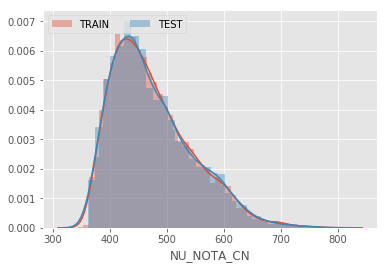

In [0]:
x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


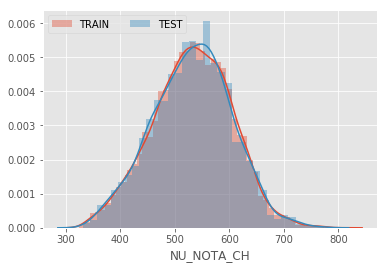

In [0]:
x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


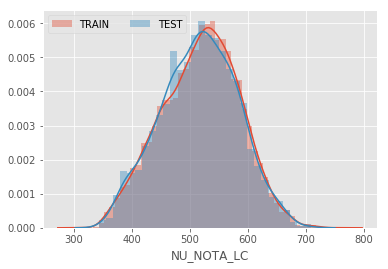

In [0]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');


Como podemos observar, agora temos dados muito mais homogêneos entre teste e treino do que quando iniciamos a nossa análise.



#Criando o modelo de regressão 

**Zerando os campos nulos de composição da nota de redação.**

In [0]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

Lembrando que selecionei essas Features para exemplificar o nosso modelo, você pode e deve fazer os seus testes. Selecionar/Testar/Criar faz parte do processo, e isso é o que toma mais parte da análise geralmente.

**Seguindo**:

    -Atribuir y_train ao meu target
    -Setar x test e x train com as features selecionadas
    -Normalizar os dados

In [0]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

O modelo que usei para fazer a regressão, no caso foi o **RandomForestRegressor**. Mais informações sobre o modelo e os parâmetros você pode ver na  [documentação.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Abaixo um gráfico para problema/algoritmo:


In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)    



Abaixo um gráfico de problemas/algoritmos apenas para exemplificar:

![alt text](http://share.opsy.st/56e7090e92b6c-MathWorks_Figure+1_Machine+Learning+Types.jpg)

**Treinando o nosso modelo através do fit.**

In [0]:
regressor.fit(x_train, y_train) 


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**Realizando a predição das notas da nossa base test:**



In [0]:
y_pred_test = regressor.predict(x_test)
#y_pred_train = regressor.predict(x_train)

O **Codenation** não disponibiliza ou comenta qual o meio que o sistema avalia as notas. Dessa forma recomendo você criar o seu próprio método de avaliação e comparar com o score de submissão.

Eu usei o MAE, MSE E RSME do metrics para analisar, você pode achar a documentação aqui.

In [0]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))


# Conclusão

O propósito aqui é estimular o pensamento analítico e exploratório dos dados. Tem alguns conceitos que não foram abordados, mas podem ser úteis em análises desse tipo.

- O [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), que nada mais é a criação de features a partir de outras.

- AutoML: [Google](https://cloud.google.com/ml-engine/?hl=pt-br), [IBM](https://www.ibm.com/cloud/watson-studio) e [Amazon](https://aws.amazon.com/pt/machine-learning/) tem seus próprios serviços de Machine Learning, onde prometem (Já entregam) muita facilidade em gerar modelos.


---

**Links úteis**



*  Codenation - https://www.codenation.dev
*  Google Colab -  https://colab.research.google.com
*  Anaconda - https://anaconda.org
* Feature Engineering  - https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219








**Minha participação no desafio**

O desafio do *Codenation*  me estimulou a pensar fora da caixa, pensar em alternativas de features, aprender bibliotecas novas e pesquisar muito!
Consegui uma posição final de **6º** com um score de **93.86%** , o qual eu achei muito bacana para uma primeira participação.

---

Obrigado por ler esse artigo!


Wesley Watanabe

**Linkedin** - https://www.linkedin.com/in/wesleywatanabe/